In [1]:
%load_ext autoreload
%autoreload 2

import torch

In [2]:
df = torch.load("./../../data/GB1/esm-1b_dataframe.pt")
df = df.sort_values("Fitness_norm", ascending=True)
embedding = torch.stack(tuple(df["Embedding"].values))
fitness = df["Fitness_norm"].values

In [8]:
si = df.loc[df["Variants"] == "VDGV"].index
fi = df.loc[df["Variants"] == "IWGF"].index

In [3]:
f = df["Fitness_norm"].values
v = df["Variants"].values
d = dict(map(lambda i,j : (i,j), v, f))

embedding = torch.load("./../../data/GB1/esm-1b_embedding_complete.pt")
variants = torch.load("./../../data/GB1/esm-1b_variants_complete.pt")
fitness = [d.get(v, 0.0) for v in variants]

data = [(embedding[i], variants[i], fitness[i]) for i in range(len(embedding))]
data.sort(key = lambda x: x[2])
embedding = [d[0] for d in data]
variants = [d[1] for d in data]
fitness = [d[2] for d in data]

In [157]:
import pickle
with open("s:\\Documents\\master\\code\\de\\data\\neighborhood_de\\history_esm1b_NDYP.pkl", 'rb') as f:
    history, history_top = pickle.load(f)
#indexes = [df.loc[df["Variants"] == residues].index for residues in history]
#indexes_top = [df.loc[df["Variants"] == residues].index for residues in history_top]
indexes = [variants.index(v) for v in history]
indexes_top = [variants.index(v) for v in history_top]
si = variants.index("VDGV")
fi = variants.index("FWAA")

In [155]:
variants[indexes[3]]

'RRFL'

In [139]:
[i == indexes_top[300] for i in indexes_top].index(True)

247

In [13]:
indexes = [10318, 33616, 43109, 43115, 16096, 84894, 97696, 38226, 40717, 114736]

PCA 2D

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pc = pca.fit_transform(embedding)

C:\Users\Matouš\AppData\Local\Temp\ipykernel_1760\1580985376.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


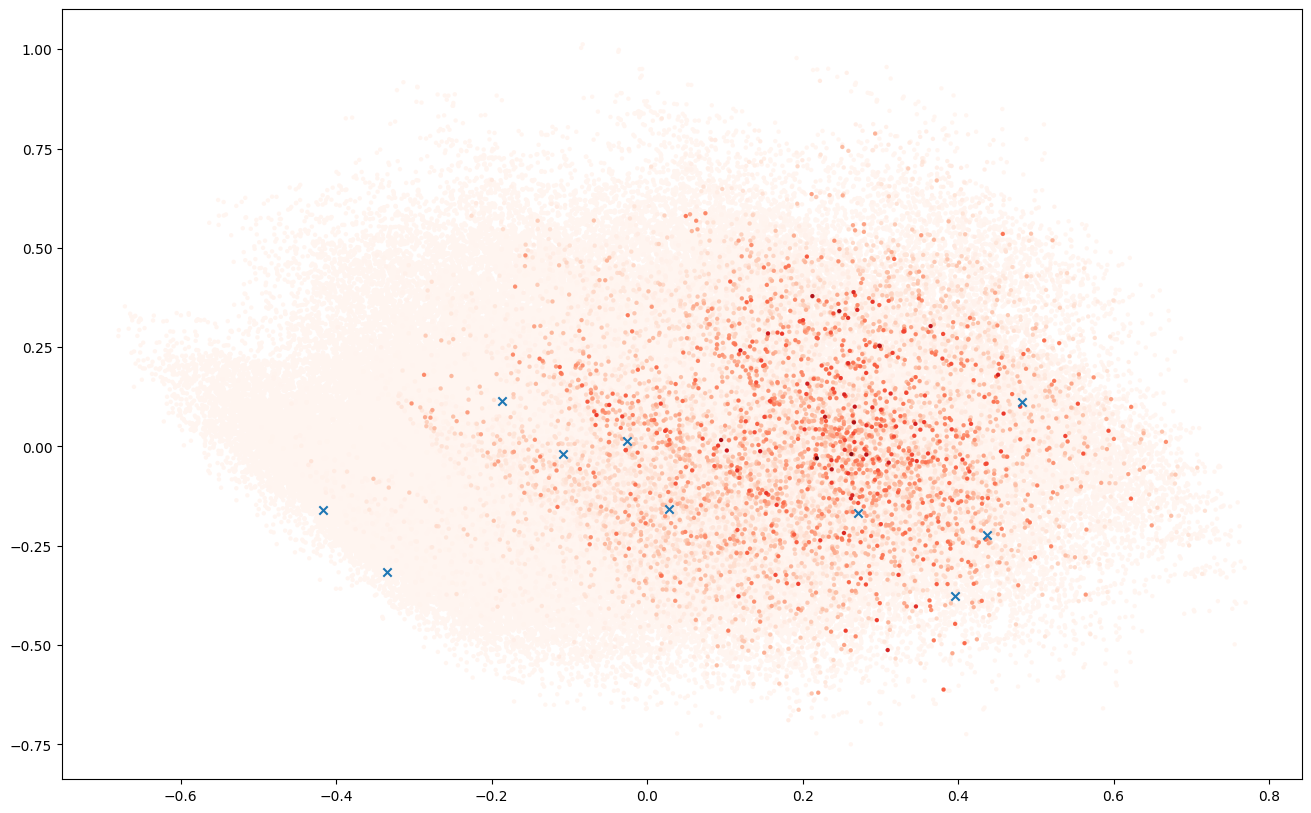

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()
ax.scatter(
    pc[:, 0],
    pc[:, 1],
    marker=".",
    # s=150,
    linewidths=0.1,
    c=fitness,
    cmap=plt.cm.Reds,
)
#ax.colorbar()

""" plt.scatter(
    pc[indexes[0], 0],
    pc[indexes[0], 1],
    marker="x",
    linewidths=2,
    c=[0],
    cmap=plt.cm.winter,
)
plt.scatter(
    pc[indexes_top[-1], 0],
    pc[indexes_top[-1], 1],
    marker="x",
    linewidths=2,
    c=[0],
    cmap=plt.cm.spring,
)
plt.scatter(
    pc[indexes_top[100], 0],
    pc[indexes_top[100], 1],
    marker="x",
    linewidths=2,
    c=[0],
    cmap=plt.cm.spring,
)
plt.scatter(
    pc[indexes_top[200], 0],
    pc[indexes_top[200], 1],
    marker="x",
    linewidths=2,
    c=[0],
    cmap=plt.cm.spring,
)

i = indexes[0:10]
ax.scatter(
    pc[i, 0],
    pc[i, 1],
    marker="x",
    linewidths=1,
    c=[0]*len(i),
    cmap=plt.cm.gray,
) """

i = indexes
ax.scatter(
    pc[i, 0],
    pc[i, 1],
    marker="x",
    #linewidths=1,
    #c=range(len(i)),
    #cmap=plt.cm.Reds,
)

PCA 3D

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

pc = pca.fit_transform(embedding)

In [49]:
pca.explained_variance_

array([0.05972436, 0.05288601, 0.02339913, 0.01714859, 0.01265054,
       0.01055757, 0.0097067 , 0.00773039, 0.00749952, 0.00662704,
       0.00594283, 0.0052725 , 0.00458017, 0.00431756, 0.00368269,
       0.00324498, 0.00304803, 0.00266584, 0.00216927, 0.00210747])

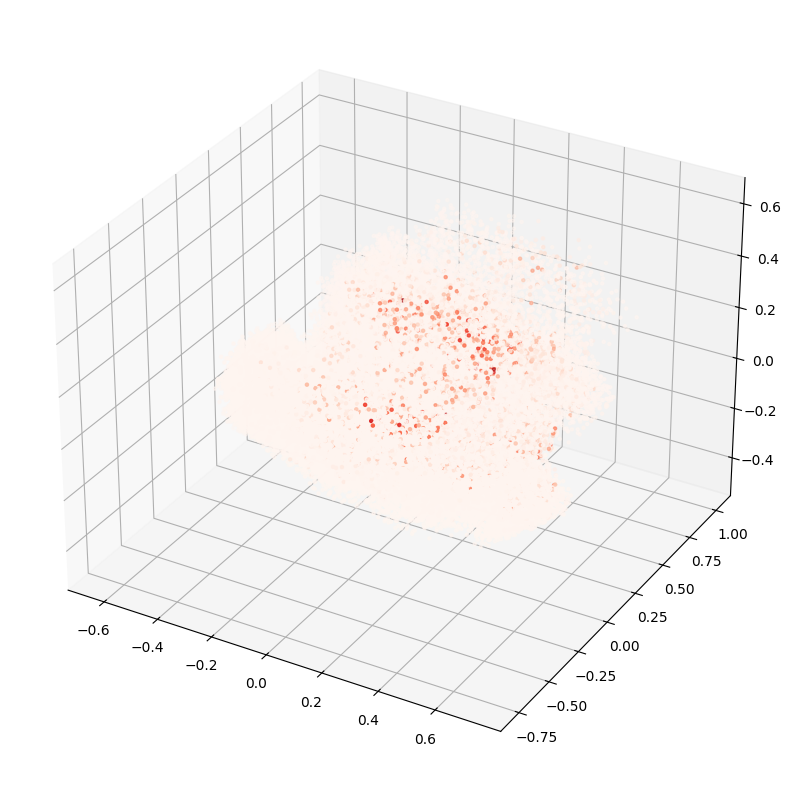

In [54]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pc[:, 0],
    ys=pc[:, 1],
    zs=pc[:, 2],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    cmap=plt.cm.Reds
)

t-SNE

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsnec = tsne.fit_transform(embedding)

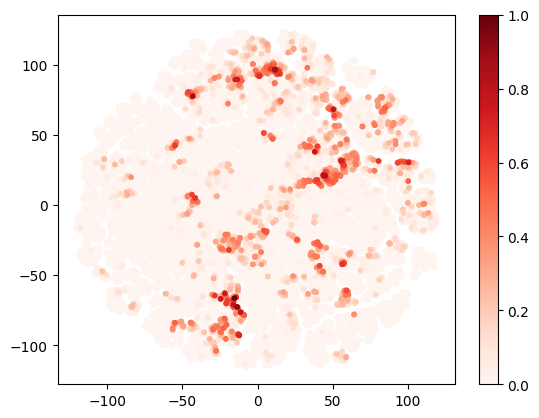

In [34]:
import matplotlib.pyplot as plt

plt.scatter(
    tsnec[:, 0],
    tsnec[:, 1],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    cmap=plt.cm.Reds
)
plt.colorbar()